In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("titanic_train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode([0]))

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

In [13]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         0
dtype: int64

In [15]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[1])

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
survivors = df.Survived.sum()
unsurvivors = len(df) - survivors

print( survivors, 'People Survived.')
print( unsurvivors, 'People did not survive.')

342 People Survived.
549 People did not survive.


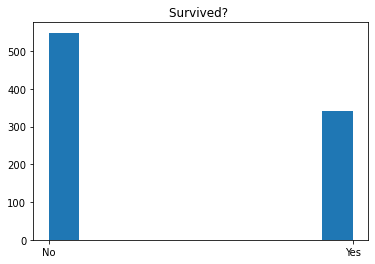

In [18]:
plt.hist(df.Survived)
plt.title('Survived? ')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show()

In [19]:
df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [20]:
df[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [21]:
df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [22]:
df[['Embarked', 'Pclass']].groupby('Embarked').mean().sort_values(by='Pclass', ascending=False)

,Pclass
Embarked,
Q,2.909091
S,2.346749
C,1.886905


In [23]:
df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [24]:
df[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

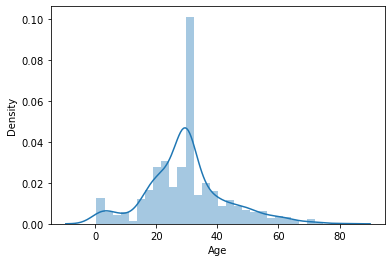

In [25]:
sns.distplot(df.Age)

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

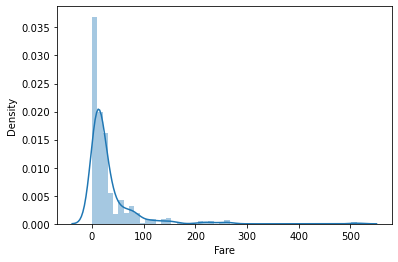

In [26]:
sns.distplot(df.Fare)

In [27]:
df.skew()

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_9568\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder

In [29]:
lab_enc=LabelEncoder()

In [30]:
df['Name']=lab_enc.fit_transform(df['Name'])
df['Sex']=lab_enc.fit_transform(df['Sex'])
df['Ticket']=lab_enc.fit_transform(df['Ticket'])
df['Cabin']=lab_enc.fit_transform(df['Cabin'])
df['Embarked']=lab_enc.fit_transform(df['Embarked'])

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

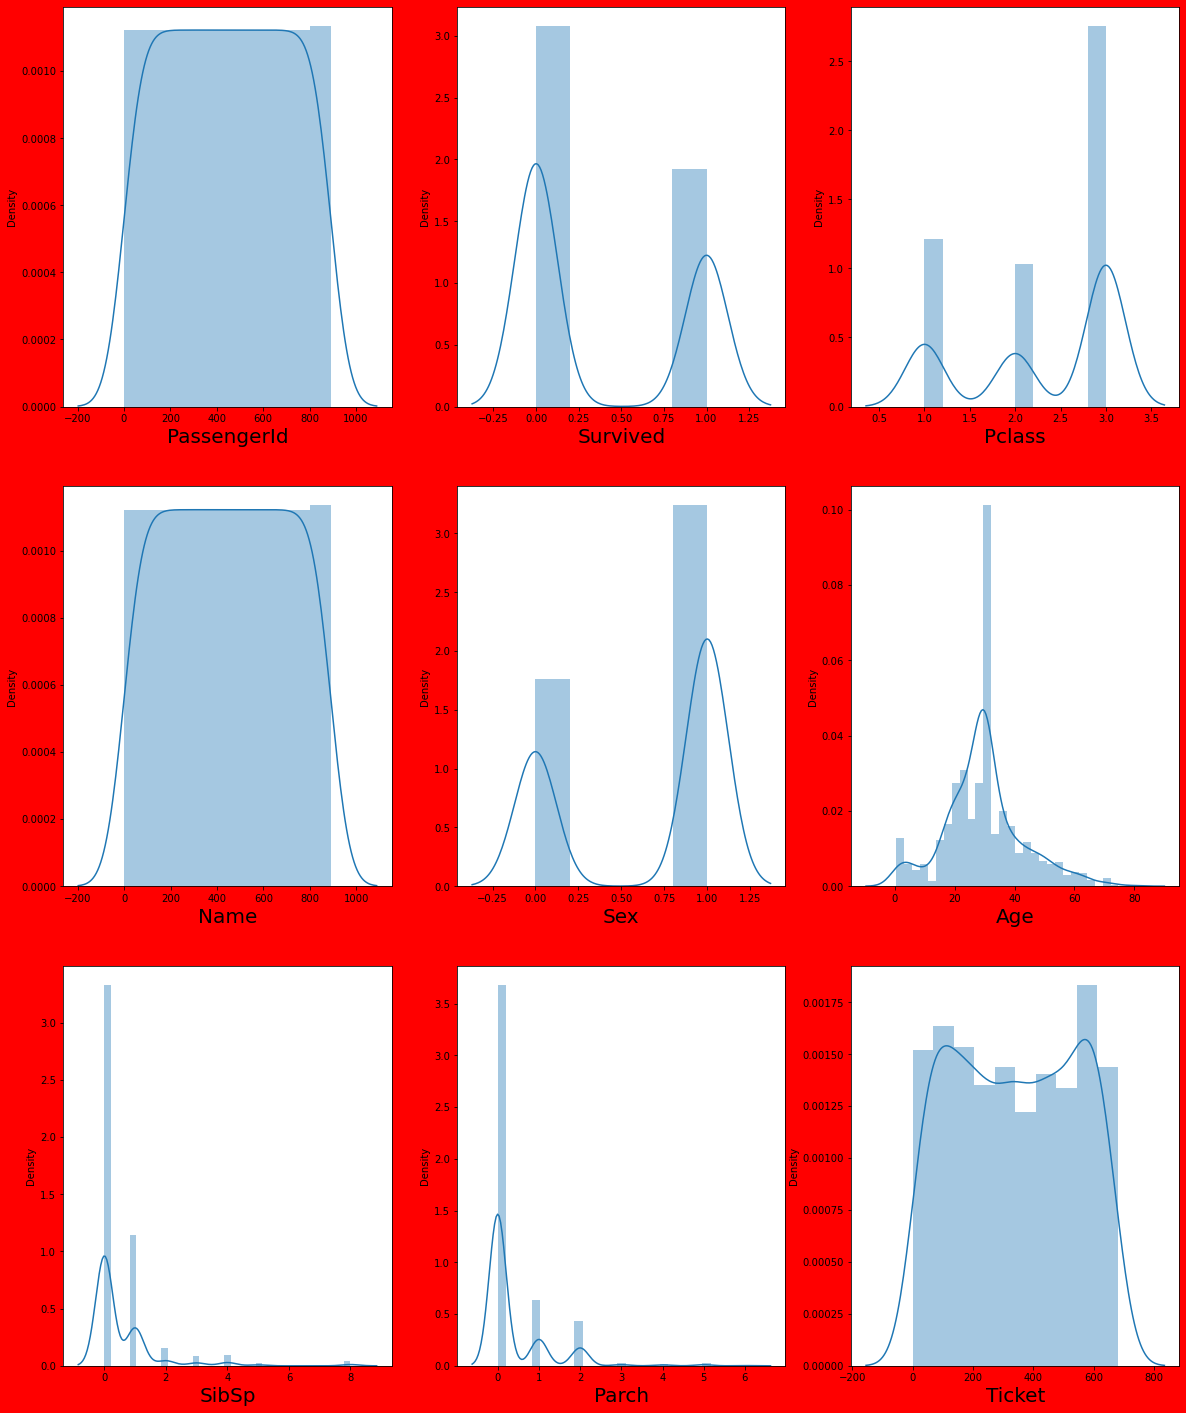

In [31]:
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [32]:
from scipy.stats import zscore

In [33]:
z_score=zscore(df[['PassengerId','Pclass','Age','SibSp','Parch','Fare']])

In [34]:
abs_score=np.abs(z_score)
filtering_entry=(abs_score < 3).all(axis=1)

In [35]:
df=df[filtering_entry]

In [36]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,445.719512,0.390244,2.310976,449.748780,0.657317,29.792831,0.348780,0.254878,331.578049,25.836051,130.187805,1.540244
std,255.213085,0.488103,0.826678,254.244564,0.474896,12.151418,0.619434,0.565308,201.150676,29.817529,33.992190,0.788866
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,2.000000,227.750000,0.000000,23.000000,0.000000,0.000000,151.750000,7.895800,145.000000,1.000000
50%,446.500000,0.000000,3.000000,448.500000,1.000000,29.699118,0.000000,0.000000,331.500000,13.000000,145.000000,2.000000
75%,661.250000,1.000000,3.000000,663.250000,1.000000,35.000000,1.000000,0.000000,507.250000,27.000000,145.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,66.000000,3.000000,2.000000,680.000000,164.866700,146.000000,2.000000


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

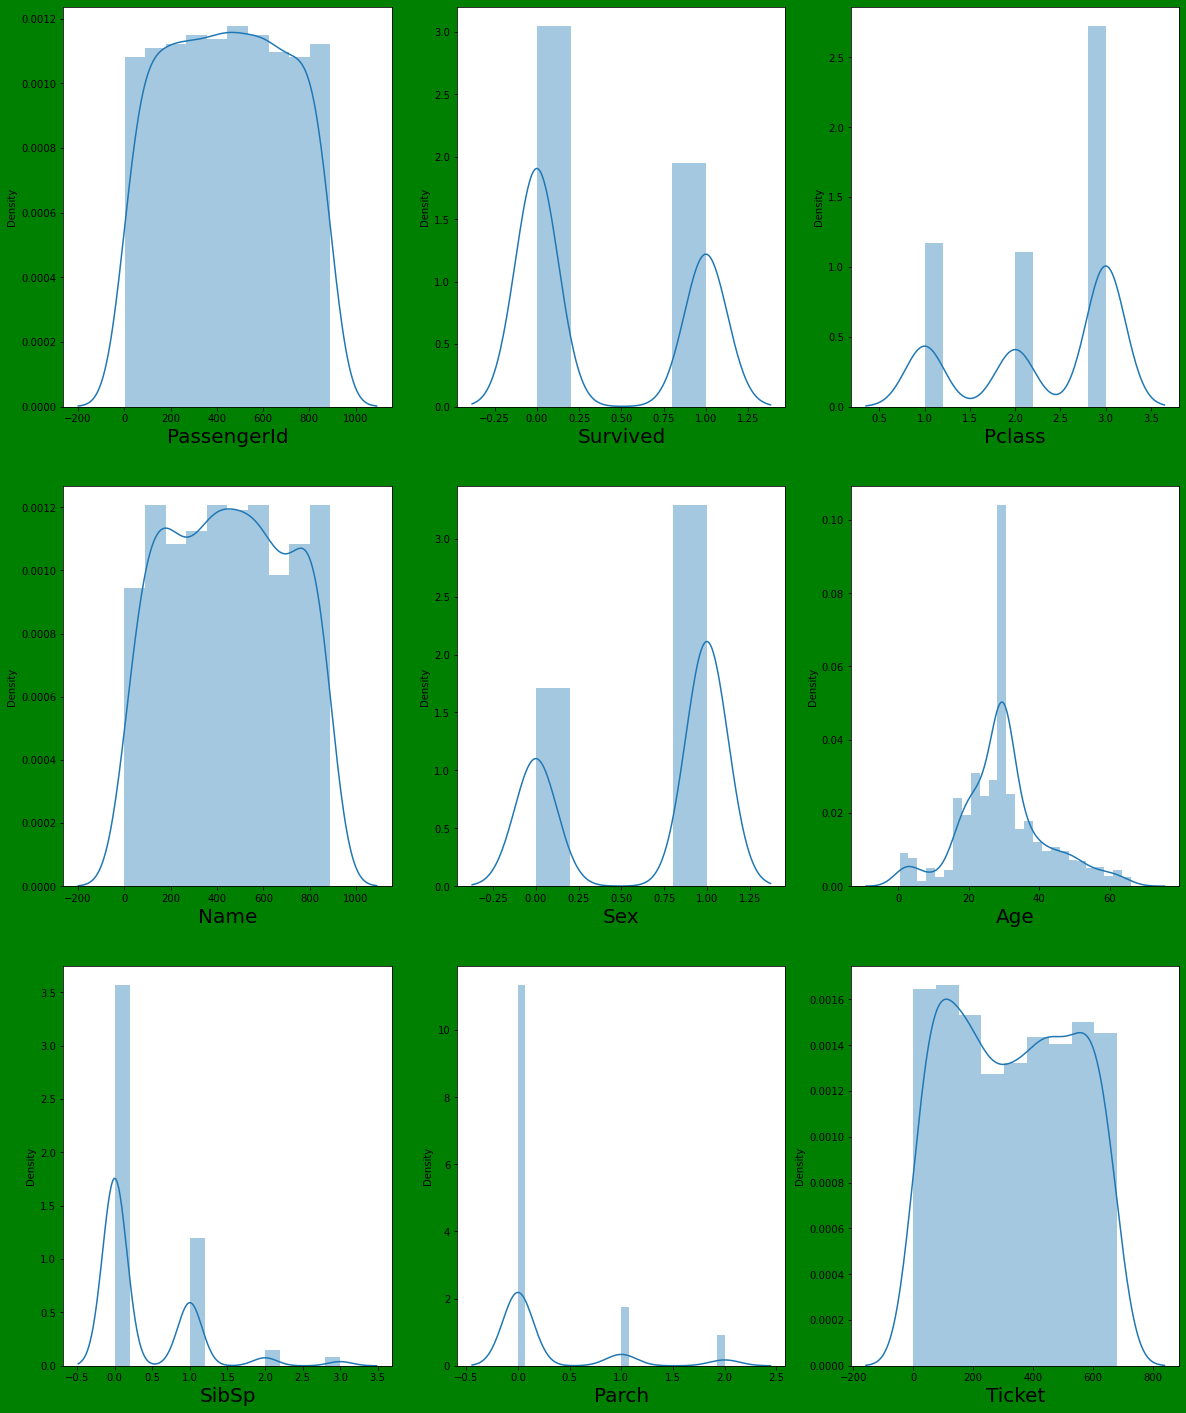

In [37]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [38]:
corr=df.corr()

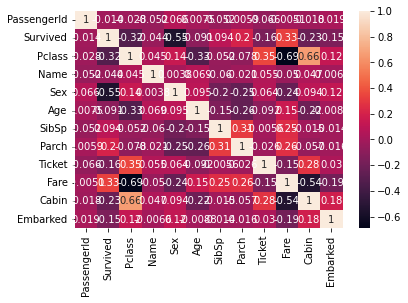

In [39]:
sns.heatmap(corr,annot=True,annot_kws={'size':10})
plt.show()

In [40]:
df=df.drop_duplicates()

In [41]:
df.head(n=11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,145,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,145,2
5,6,0,3,554,1,29.699118,0,0,275,8.4583,145,1
6,7,0,1,515,1,54.000000,0,0,85,51.8625,129,2
7,8,0,3,624,1,2.000000,3,1,395,21.0750,145,2
8,9,1,3,412,0,27.000000,0,2,344,11.1333,145,2
9,10,1,2,576,0,14.000000,1,0,132,30.0708,145,0


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

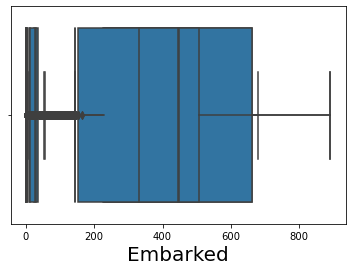

In [42]:
for column in df:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

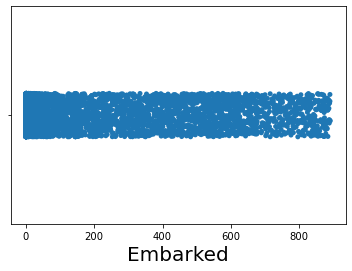

In [43]:
for column in df:
    if plotnumber<=9 :
        ax=plt.subplot(3,3,plotnumber)
    sns.stripplot(df[column])
    plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [44]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score

In [46]:
scalar=StandardScaler()

In [47]:
X_scaled=scalar.fit_transform(X)

In [48]:
X_scaled.shape

(820, 11)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.7,random_state=40)

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
reg= RandomForestRegressor()

In [52]:
reg.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
y_pred=reg.predict(x_test)

In [54]:
y_pred

array([0.08, 0.83, 0.11, 0.16, 0.02, 0.57, 0.93, 0.04, 0.5 , 0.74, 0.91,
       0.41, 0.23, 0.34, 0.26, 0.21, 0.03, 0.  , 0.84, 0.58, 0.61, 0.95,
       0.43, 0.71, 0.03, 0.  , 0.16, 0.67, 0.64, 0.43, 0.29, 0.23, 0.44,
       0.07, 0.08, 0.18, 0.11, 0.02, 0.02, 0.03, 0.01, 0.61, 0.51, 0.56,
       0.94, 0.01, 0.14, 0.03, 0.55, 0.36, 0.34, 0.97, 0.28, 0.11, 0.95,
       0.04, 0.87, 0.56, 0.22, 0.96, 0.69, 0.05, 0.  , 0.02, 0.95, 0.66,
       0.98, 0.06, 0.57, 0.02, 0.64, 0.54, 0.67, 0.95, 0.5 , 0.98, 0.52,
       0.13, 0.14, 0.95, 0.41, 0.06, 1.  , 0.82, 0.01, 0.03, 0.38, 0.06,
       0.79, 0.  , 0.77, 0.1 , 0.97, 0.91, 0.26, 0.95, 0.21, 0.6 , 0.18,
       1.  , 0.56, 0.  , 0.09, 0.29, 0.43, 0.97, 0.11, 0.3 , 0.75, 0.72,
       0.02, 0.02, 0.01, 0.02, 0.  , 0.18, 0.04, 0.88, 0.14, 0.76, 0.  ,
       0.9 , 0.45, 0.04, 0.12, 0.69, 0.87, 0.02, 0.94, 0.39, 0.08, 0.  ,
       0.63, 0.01, 0.54, 0.22, 0.24, 0.96, 0.  , 0.1 , 0.58, 0.01, 0.98,
       0.09, 0.23, 0.02, 0.9 , 0.95, 0.05, 0.84, 0.

In [55]:
from sklearn.metrics import r2_score

In [56]:
def metric_score(reg,X_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=reg.predict(X_train)
        print("Train R2 SCORE",r2_score(y_train,y_pred))
    
     
        
        
    elif train==False:
        pred=reg.predict(x_test)
        print("Test R2 SCORE",r2_score(y_test,pred))

In [57]:
metric_score(reg,x_train,x_test,y_train,y_test,train=True)
metric_score(reg,x_train,x_test,y_train,y_test,train=False)

Train R2 SCORE 0.9269306233450225
Test R2 SCORE 0.3699373266189593


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [59]:
lr=LinearRegression()
dt=DecisionTreeRegressor()

In [60]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [61]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)

Train R2 SCORE 1.0
Test R2 SCORE 0.10893188444208846


In [62]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

Train R2 SCORE 0.47950063092442474
Test R2 SCORE 0.3303541238686527


In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [68]:
ada=AdaBoostRegressor()

In [70]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [71]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

Train R2 SCORE 0.3324571956909679
Test R2 SCORE 0.18551858327609605


In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
grid_param={'criterion':['squared_error','absolute_error'],'max_depth':[2,5],'min_samples_leaf':[2,10],
            'min_samples_split':[3,10],
            'max_leaf_nodes':[5,10]}

In [65]:
grid_search=GridSearchCV(estimator=reg,param_grid=grid_param,cv=5,n_jobs=-1)

In [66]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 5], 'max_leaf_nodes': [5, 10],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [3, 10]})

In [122]:
df['Parch']=np.log(df['Parch'])
df['Fare']=np.log(df['Fare'])
df['SibSp']=np.log(df['SibSp'])

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [123]:
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Name           0.010147
Sex           -0.664152
Age            0.318314
SibSp               NaN
Parch               NaN
Ticket         0.039240
Fare           0.481893
Cabin         -2.306845
Embarked      -1.277386
dtype: float64

In [124]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [125]:
import pickle

In [126]:
pickle.dump(reg,open('reg_model','wb'))